# Bayesian Linear Regression part 1: plotting samples from the weight prior

I took Iain Murray's Machine Learning and Pattern Recognition course this fall. It was fun and challenging.
I often studied by coding demos, and some of them are kinda cool and I wanted to share them.
I'm going to start with something that shows up a few times: priors on linear regression parameters. This is based on [this lecture](http://www.inf.ed.ac.uk/teaching/courses/mlpr/2017/notes/w6c_bayesian_regression.html).

Quick review: least squares linear regression that finds a single optimal fit to observations by reducing the least squares error.

Instead of finding a single fit, Bayesian linear regression model gives a distribution over all possible fits. It's a little weird to think about.
One component of Bayesian Linear Regression is a prior on the linear regression parameters. If I have a linear model

$$y = wx + b,$$

instead of setting a single value for \\(w\\) and \\(b\\), I could say \\(w\\) and \\(b\\) are normally distributed with means \\(\mu_w\\) and \\(\mu_b\\) and variances \\(\sigma_w^2\\) and \\(\sigma_b^2\\).

To find those parameter distributions in Bayesian land, I'd start with a prior distribution that says what kinds of functions I'd expect before seeing any data. Then I'd combine that with my observations in the form of the likelihood. The result is the posterior distribution, which is what I'd predict based on.

In this post, I'll just show how to sample a couple \\(w\\) and \\(b\\) from a 2D Gaussian distribution and plot them.

In [1]:
# imports!
import numpy as np
import matplotlib.pyplot as plt

# helper functions you can skip over :D
SAVE = False
def maybe_save_plot(filename):
    if SAVE:
        plt.tight_layout()
        plt.savefig('images/' + filename, bbox_inches="tight")

## Sampling from the prior

Here's some code that samples from a prior distribution on parameters.

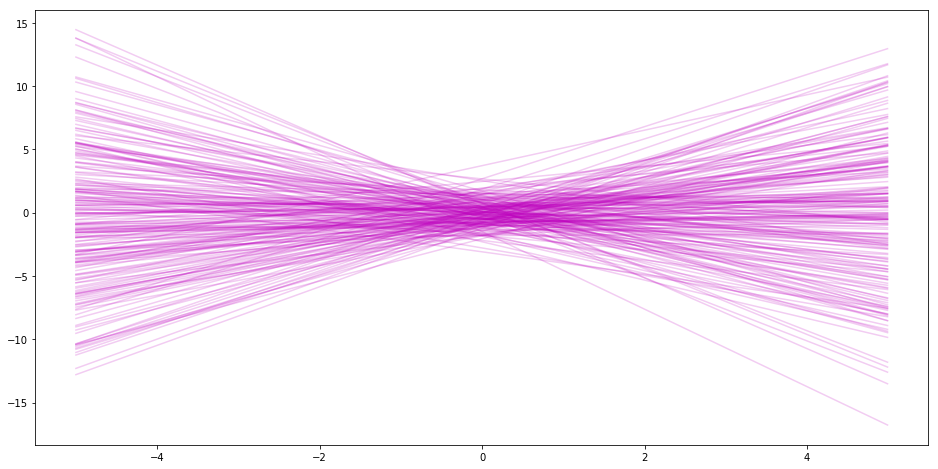

In [2]:
# Set up the values to be plotted
grid_size = 0.01
x_grid = np.arange(-5, 5, grid_size)
D = 2  # There are two parameters

# Augment x_grid with 1s to handle the bias term
X = np.vstack((
    np.ones(x_grid.shape[0]),
    x_grid
)).T

# How many functions to sample from the prior
line_count = 200

# Set the mu and sigma for the Gaussian on the parameters
mu_w = 0
mu_b = 0

sigma_w = 1.0
sigma_b = 1.0

w_0 = np.hstack([mu_b, mu_w])
V_0 = np.diag([sigma_b, sigma_w])**2

# Phew. Here's the part where I sample from the prior!
w = np.random.randn(line_count, D) @ V_0 + w_0

# And now plot it!
plt.figure(figsize=(16, 8))
plt.plot(x_grid, X @ w.T, '-m', alpha=.2)
plt.show()

### Examples

Adjusting `sigma_b` changes the most likely y-intercept. A small `sigma_b` makes more points go through the origin (top), and a large `sigma_b` makes points spread out more.

In [3]:
# set up helper code
def sample_prior_weights(x_grid, mu_w=0, mu_b=0, sigma_w=0.2, sigma_b=0.2):
    X = np.vstack((
        np.ones(x_grid.shape[0]),
        x_grid
    )).T

    w_0 = np.hstack([mu_b, mu_w])
    V_0 = np.diag([sigma_b, sigma_w])**2
    
    w = np.random.randn(line_count, D) @ V_0 + w_0
    
    return X @ w.T

`sigma_w = 0.2`

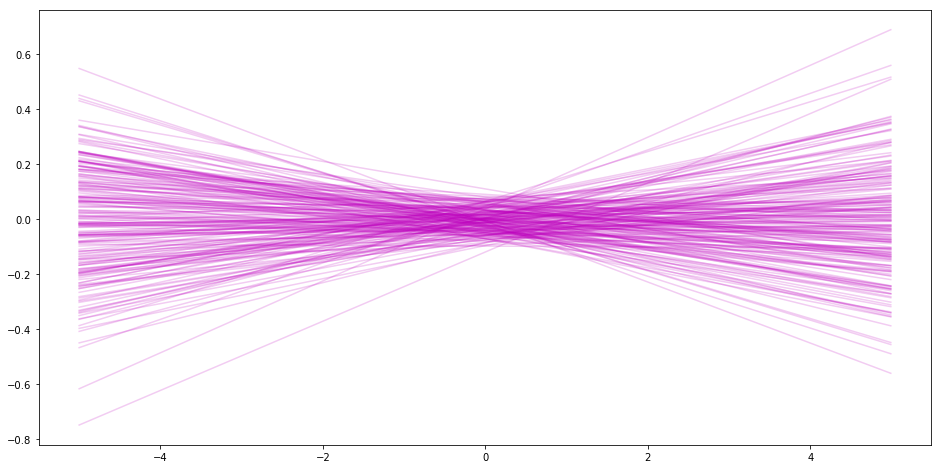

In [4]:
y = sample_prior_weights(x_grid, sigma_w=0.2)

plt.figure(figsize=(16, 8))
plt.plot(x_grid, y, '-m', alpha=.2)
maybe_save_plot('2018-01-03-small-w')
plt.show()

`sigma_w = 1.0`

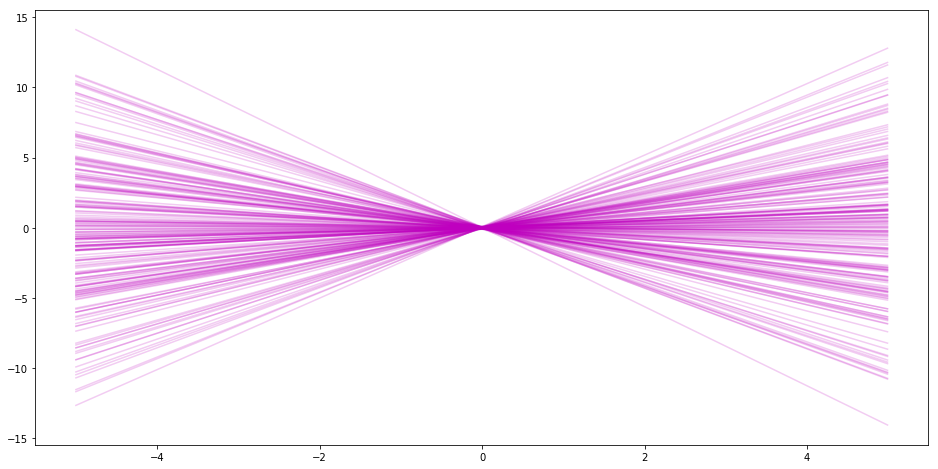

In [5]:
y = sample_prior_weights(x_grid, sigma_w=1.0)

plt.figure(figsize=(16, 8))
plt.plot(x_grid, y, '-m', alpha=.2)
maybe_save_plot('2018-01-03-big-w')
plt.show()

And by setting the \\(\mu\\), it makes the slopes and intercepts usually near that value.

`mu_w = 0.5`

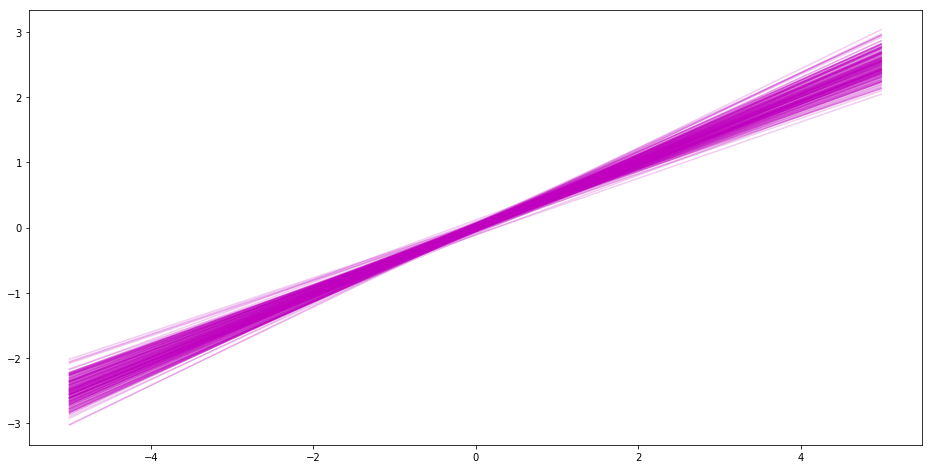

In [6]:
y = sample_prior_weights(x_grid, mu_w=0.5)

plt.figure(figsize=(16, 8))
plt.plot(x_grid, y, '-m', alpha=.2)
maybe_save_plot('2018-01-03-big-muw')
plt.show()

## What's next?

[Observations](2018-01-08-bayesian-linreg-sample.ipynb), [posteriors on the weights](2018-01-09-bayesian-linreg-posterior.ipynb), and then [plotting predictions based on it!](2018-01-10-bayesian-linreg-plots.ipynb)


### [Next](2018-01-08-bayesian-linreg-sample.ipynb)

## See Also

 - The [MLPR](http://www.inf.ed.ac.uk/teaching/courses/mlpr/2017/) is lots of fun.
 - [Katarina's post](http://katarinahoeger.com/jekyll/mathematics/2017/12/08/jekyll-supports-math.html) helped me get mathjax in Jekyll!